In [225]:
import numpy as np
from astropy.coordinates import SkyCoord, SkyOffsetFrame
import astropy.units as u
from astropy.io import fits
from gammapy.cube import make_map_background_irf
from gammapy.irf import Background3D
from gammapy.maps import WcsGeom, MapAxis, Map

In [162]:
f = fits.open('../scripts/dummy_bgmodel.fits.gz')
f.info()

Filename: ../scripts/dummy_bgmodel.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     31   1R x 7C   [50D, 50D, 50D, 50D, 20D, 20D, 50000D]   


In [163]:
bkg=Background3D.from_hdulist(f, '')

In [217]:
ra_obj = 228.
dec_obj = -60.

In [218]:
pointing = SkyCoord(228., -60., unit='deg', frame='icrs')

In [219]:
eaxis = MapAxis.from_edges(np.logspace(-1, 2, 21), unit='TeV', name='energy', interp='log')

geom = WcsGeom.create(
    skydir=(ra_obj, dec_obj),
    binsz=0.1,
    width=(5, 5),
    coordsys='CEL',
    proj='CAR',
    axes=[eaxis]
)

geom_2d = WcsGeom.create(
    skydir=(ra_obj, dec_obj),
    binsz=0.1,
    width=(5, 5),
    coordsys='CEL',
    proj='CAR'
)

In [220]:
bgmap = make_map_background_irf(pointing, 50.*3600*u.s, bkg, geom)

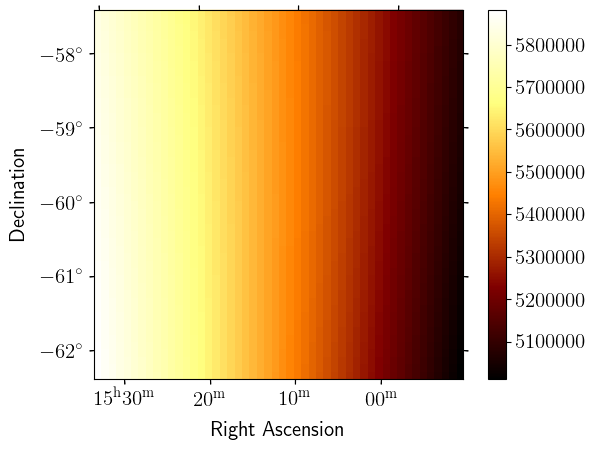

In [221]:
bgmap.sum_over_axes().plot(add_cbar=True);

In [222]:
rmax = bgmap.sum_over_axes().data[:,0].max()
rmin = bgmap.sum_over_axes().data[:,-1].min()
(rmax-rmin)/rmax

0.14808252379254228

In [253]:
sa = geom.solid_angle()[0]
amax = sa[:,0].max()
amin = sa[:,-1].min()
(rmax-rmin)/rmax

0.14808252379254228

In [261]:
sa.value

array([[3.27109602e-06, 3.26288296e-06, 3.25459153e-06, ...,
        2.80927009e-06, 2.79801058e-06, 2.78670386e-06],
       [3.27066741e-06, 3.26247416e-06, 3.25420308e-06, ...,
        2.81028627e-06, 2.79906646e-06, 2.78779968e-06],
       [3.27023258e-06, 3.26205907e-06, 3.25380830e-06, ...,
        2.81128828e-06, 2.80010790e-06, 2.78888081e-06],
       ...,
       [3.24380148e-06, 3.23646460e-06, 3.22906996e-06, ...,
        2.84248982e-06, 2.83285942e-06, 2.82319152e-06],
       [3.24305367e-06, 3.23573429e-06, 3.22835751e-06, ...,
        2.84288929e-06, 2.83328913e-06, 2.82365163e-06],
       [3.24229858e-06, 3.23499667e-06, 3.22763769e-06, ...,
        2.84327654e-06, 2.83370645e-06, 2.82409919e-06]])